# Fetching Up to date forecast

this notebook show a simple way to fetch the up to date forecast of the ARPEGE 0.1° model from the météo France, hosted on [meteo.data.gouv.fr](https://meteo.data.gouv.fr/datasets/65bd13b2eb9e79ab309f6e63).

In [32]:
import pandas as pd

base_url = "https://object.data.gouv.fr/meteofrance-pnt/pnt/{date}T{time}Z/arpege/01/SP1/arpege__01__SP1__{forecast}__{date}T{time}Z.grib2"

forecast_horizons = ["000H012H", "013H024H"]
date = pd.Timestamp("today").strftime("%Y-%m-%d")
time = "00:00:00"

url = base_url.format(forecast=forecast_horizons[0], date=date, time=time)
print(url)

https://object.data.gouv.fr/meteofrance-pnt/pnt/2024-06-14T00:00:00Z/arpege/01/SP1/arpege__01__SP1__000H012H__2024-06-14T00:00:00Z.grib2


In [33]:
import requests

tmp_dir = "/tmp"
for forecast in forecast_horizons:
    url = base_url.format(forecast=forecast, date=date, time=time)
    print(url)
    filename = f"{tmp_dir}/arpege__01__SP1__{forecast}__{date}T{time}Z.grib2"
    r = requests.get(url, allow_redirects=True)
    open(filename, "wb").write(r.content)

https://object.data.gouv.fr/meteofrance-pnt/pnt/2024-06-14T00:00:00Z/arpege/01/SP1/arpege__01__SP1__000H012H__2024-06-14T00:00:00Z.grib2
https://object.data.gouv.fr/meteofrance-pnt/pnt/2024-06-14T00:00:00Z/arpege/01/SP1/arpege__01__SP1__013H024H__2024-06-14T00:00:00Z.grib2


In [34]:
import xarray as xr

KEYS_FILTER_SSPD = {
    "typeOfLevel": "surface",
    "cfVarName": "ssrd",
}
KEYS_FILTER_WIND = {
    "typeOfLevel": "heightAboveGround",
    "level": 10,
    "cfVarName": "si10",
}
KEYS_FILTER_T2M = {
    "typeOfLevel": "heightAboveGround",
    "level": 2,
    "cfVarName": "t2m",
}

da_suns = []
da_winds = []
for forecast_horizon in forecast_horizons:
    filename = f"{tmp_dir}/arpege__01__SP1__{forecast_horizon}__{date}T{time}Z.grib2"
    da_tmp = xr.open_dataset(
        filename, engine="cfgrib", backend_kwargs={"filter_by_keys": KEYS_FILTER_SSPD}
    ).ssrd
    da_suns.append(da_tmp)
    da_tmp = xr.open_dataset(
        filename, engine="cfgrib", backend_kwargs={"filter_by_keys": KEYS_FILTER_WIND}
    ).si10
    da_winds.append(da_tmp)

da_sun = xr.concat(da_suns, dim="step")
da_wind = xr.concat(da_winds, dim="step")

Ignoring index file '/tmp/arpege__01__SP1__000H012H__2024-06-14T00:00:00Z.grib2.789e2.idx' older than GRIB file
Ignoring index file '/tmp/arpege__01__SP1__000H012H__2024-06-14T00:00:00Z.grib2.d5933.idx' older than GRIB file
Ignoring index file '/tmp/arpege__01__SP1__013H024H__2024-06-14T00:00:00Z.grib2.789e2.idx' older than GRIB file
Ignoring index file '/tmp/arpege__01__SP1__013H024H__2024-06-14T00:00:00Z.grib2.d5933.idx' older than GRIB file


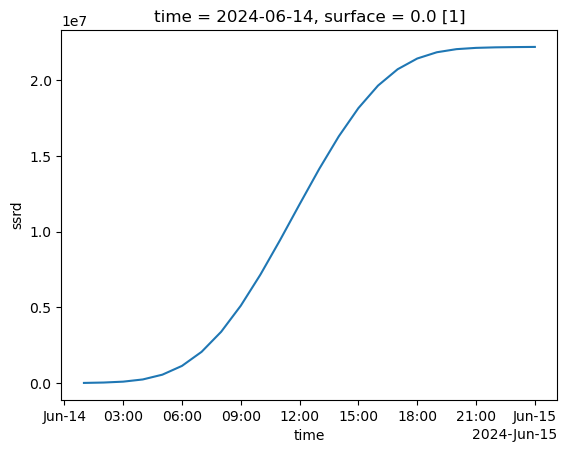

In [35]:
da_sun.mean(["latitude", "longitude"]).plot(x="valid_time")

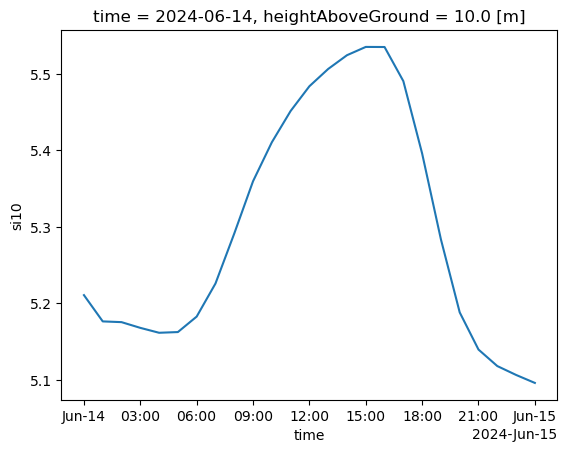

In [36]:
da_wind.mean(["latitude", "longitude"]).plot(x="valid_time")